In [197]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/BOAZ/미니 프로젝트 1/data/main data/WELFake_Dataset.csv",index_col=0)

data_row

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [198]:
data_row=data_row.dropna(axis=0)
data_row

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [199]:
text_data=data_row.drop(columns=['label'])
label=pd.DataFrame(data_row['label'])
print(text_data.shape)
print(label.shape)

(71537, 2)
(71537, 1)


In [200]:
text_data

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...
...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n..."
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...


In [201]:
label

,label
0,1
2,1
3,0
4,1
5,1
...,...
72129,0
72130,1
72131,0
72132,0


In [202]:
vocab_size=10000
messages=text_data.copy()

In [203]:
messages.reset_index(inplace=True)

In [204]:
messages

,index,title,text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
3,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
4,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...
...,...,...,...
71532,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...
71533,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n..."
71534,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...
71535,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...


In [205]:
messages['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [206]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/withmocha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [207]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    
  
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [208]:
corpus[:10]

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet']

In [209]:
max_length = max(len(sentence.split()) for sentence in corpus)

print("max_length:", max_length)

max_length: 47


In [210]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense, Dropout

In [211]:
onehot_repr=[one_hot(words,vocab_size) for words in corpus] 

In [212]:
onehot_repr[:5]

[[7188, 6496, 5911, 9423, 6095, 8678, 2578, 1592, 2033, 9943, 3544, 4474],
 [6244,
  6529,
  9724,
  6876,
  7881,
  6165,
  8865,
  4033,
  2948,
  6307,
  2653,
  3264,
  3196,
  4474],
 [6549, 830, 5168, 4119, 6178, 775, 3738, 5177, 2615, 2776, 5943, 3171],
 [4174, 675, 9409, 1415, 4108, 2184, 9991, 4193, 4423, 5526, 1892],
 [1658, 3738, 2743, 2046, 8618, 3883, 6651, 7649, 2743]]

In [213]:
sentence_length = 50
embedding_vector_features=100
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[   0    0    0 ... 9943 3544 4474]
 [   0    0    0 ... 3264 3196 4474]
 [   0    0    0 ... 2776 5943 3171]
 ...
 [   0    0    0 ... 9618 6504  217]
 [   0    0    0 ...   47 5077 4839]
 [   0    0    0 ... 5457 5466  802]]


In [214]:
import numpy as np  

X_final = np.array(embedded_docs)
y_final = np.array(label)
X_final.shape,y_final.shape

((71537, 50), (71537, 1))

In [215]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [216]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
import tensorflow as tf

def create_transformer_model(vocab_size, embedding_vector_features, sentence_length):
    inputs = Input(shape=(sentence_length,))
    
    embedding_layer = Embedding(vocab_size, embedding_vector_features, input_length=sentence_length)(inputs)
    
    transformer_output = MultiHeadAttention(num_heads=4, key_dim=32)(embedding_layer, embedding_layer)
    transformer_output = LayerNormalization(epsilon=1e-6)(transformer_output + embedding_layer)
    
    transformer_output = MultiHeadAttention(num_heads=4, key_dim=32)(transformer_output, transformer_output)
    transformer_output = LayerNormalization(epsilon=1e-6)(transformer_output + transformer_output)
    
    dense_output = Dense(128, activation='elu')(transformer_output)
    dense_output = Dropout(0.2)(dense_output)
    dense_output = Dense(64, activation='elu')(dense_output)
    dense_output = Dropout(0.2)(dense_output)
    
    pooled_output = GlobalAveragePooling1D()(dense_output)
    outputs = Dense(1, activation='sigmoid')(pooled_output)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model




model = create_transformer_model(vocab_size, embedding_vector_features, sentence_length)
print(model.summary())

/opt/anaconda3/envs/conda_cpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 50, 100)   │  1,000,000 │ input_layer_16[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 100)   │     51,684 │ embedding_14[0][… │
│ (MultiHeadAttentio… │                   │            │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_30 (Add)        │ (None, 50, 100)   │          0 │ multi_head_atten… │
│                     │                   │            │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 100)   │        200 │ add_30[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 100)   │     51,684 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_31 (Add)        │ (None, 50, 100)   │          0 │ multi_head_atten… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 100)   │        200 │ add_31[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 50, 128)   │     12,928 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_66          │ (None, 50, 128)   │          0 │ dense_48[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 50, 64)    │      8,256 │ dropout_66[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_67          │ (None, 50, 64)    │          0 │ dense_49[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ dropout_67[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 1)         │         65 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,125,017 (4.29 MB)

 Trainable params: 1,125,017 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

None


In [217]:
training_record = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    #callbacks=[early_stopping, model_checkpoint],
                    validation_split=0.4,
                    shuffle=True)

Epoch 1/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.7114 - loss: 0.5241 - val_accuracy: 0.8852 - val_loss: 0.2761
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9105 - loss: 0.2284 - val_accuracy: 0.8872 - val_loss: 0.2774
Epoch 3/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9283 - loss: 0.1763 - val_accuracy: 0.8858 - val_loss: 0.2927
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9434 - loss: 0.1402 - val_accuracy: 0.8824 - val_loss: 0.3454
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9576 - loss: 0.1050 - val_accuracy: 0.8814 - val_loss: 0.3712
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9722 - loss: 0.0731 - val_accuracy: 0.8817 - val_loss: 0.4482
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.9794 - loss: 0.0560 - val_accuracy: 0.8794 - val_loss: 0.4846
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.9855 - loss: 0.0400 - 

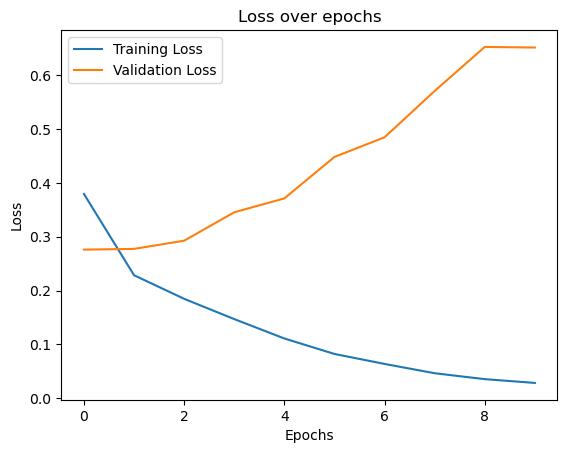

In [218]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, accuracy_score
import seaborn as sns

plt.plot(training_record.history['loss'], label='Training Loss')
plt.plot(training_record.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


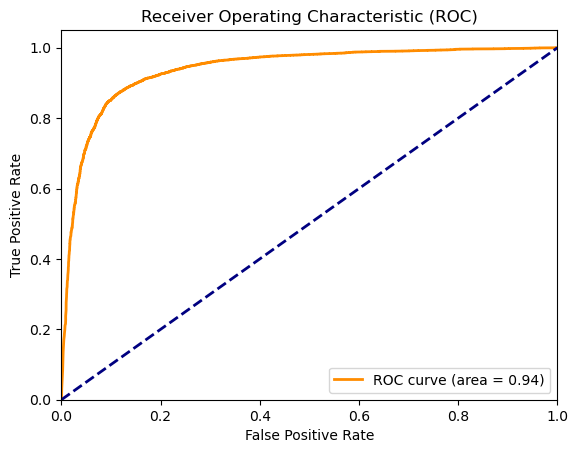

In [219]:
y_pred_prob = model.predict(x_test).ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

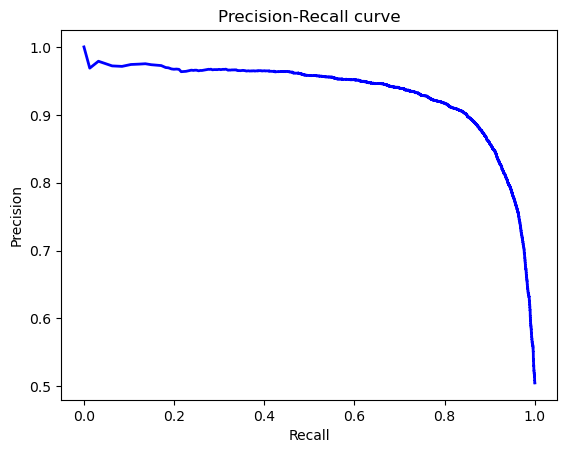

In [220]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

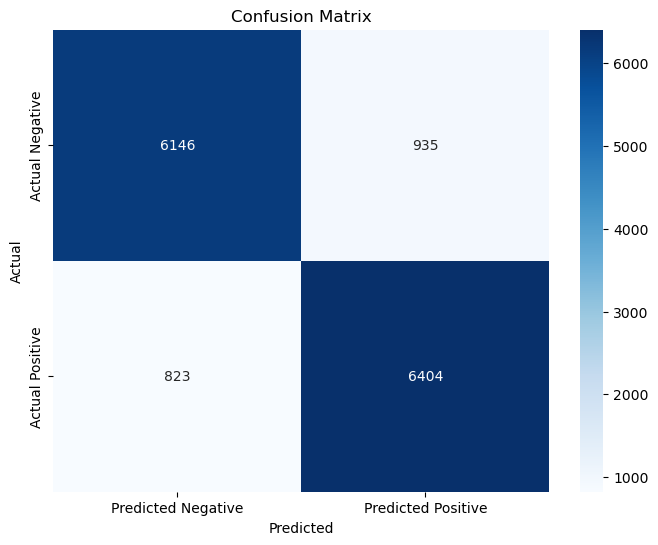

In [221]:
y_pred = (y_pred_prob > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [222]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7081
           1       0.87      0.89      0.88      7227

    accuracy                           0.88     14308
   macro avg       0.88      0.88      0.88     14308
weighted avg       0.88      0.88      0.88     14308



In [223]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [224]:
model.save('Transformer model.keras')